In [1]:

from sdv.single_table import CTGANSynthesizer, GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
from sdv.single_table import TVAESynthesizer

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [ ]:
# Paths
DATA_PATH = "data/data_outputs/train_df.csv"
OUTPUT_DIR = "data/data_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

SYN_SAMPLES = 10000  # Number of synthetic records to generate

In [ ]:
# Load training data
train_df = pd.read_csv(DATA_PATH)

In [ ]:
# Define metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=train_df)

In [ ]:
# Train CTGAN with 300 epochs, no other paramter changes
print("Training CTGAN...")
ctgan = CTGANSynthesizer(metadata, epochs=300, verbose=True)
ctgan.fit(train_df)

Training CTGAN...


/Users/brandon/Documents/synth_data_proj/synth_data_proj_venv/lib/python3.9/site-packages/sdv/single_table/base.py:144: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/Users/brandon/Documents/synth_data_proj/synth_data_proj_venv/lib/python3.9/site-packages/sdv/single_table/base.py:122: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-0.39) | Discrim. (-0.27): 100%|██████████| 300/300 [08:54<00:00,  1.78s/it]


In [ ]:
# Generate synthetic data from CTGAN
synthetic_ctgan = ctgan.sample(num_rows=SYN_SAMPLES)
synthetic_ctgan.to_csv(os.path.join(OUTPUT_DIR, "synthetic_ctgan.csv"), index=False)
print("CTGAN synthetic data saved.")

CTGAN synthetic data saved.


In [ ]:
# Train GuassianCopula
print("Training GaussianCopula...")
copula = GaussianCopulaSynthesizer(metadata)
copula.fit(train_df)

/Users/brandon/Documents/synth_data_proj/synth_data_proj_venv/lib/python3.9/site-packages/sdv/single_table/base.py:144: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


Training GaussianCopula...


In [ ]:
# Generate synthetic data from GaussianCopula
synthetic_copula = copula.sample(num_rows=SYN_SAMPLES)
synthetic_copula.to_csv(os.path.join(OUTPUT_DIR, "synthetic_copula.csv"), index=False)
print("Copula synthetic data saved.")

Copula synthetic data saved.


In [ ]:
# Train TVAE
print("Training TVAE...")
tvae = TVAESynthesizer(metadata, epochs=300)
tvae.fit(train_df)


# Generate synthetic data from TVAE
synthetic_tvae = tvae.sample(num_rows=SYN_SAMPLES)
synthetic_tvae.to_csv(os.path.join(OUTPUT_DIR, "synthetic_tvae.csv"), index=False)
print("TVAE synthetic data saved.")


Training TVAE...


/Users/brandon/Documents/synth_data_proj/synth_data_proj_venv/lib/python3.9/site-packages/sdv/single_table/base.py:144: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


TVAE synthetic data saved.


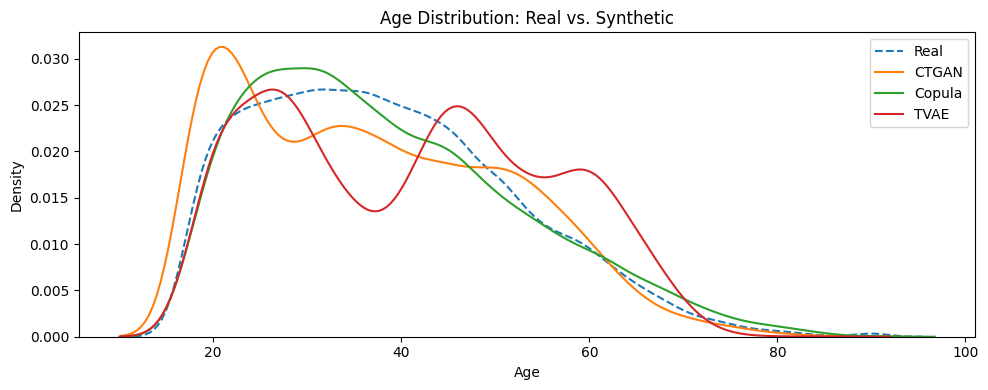

In [ ]:

# Plot age distributions for all datasets
plt.figure(figsize=(10, 4))
sns.kdeplot(train_df["age"], label="Real", linestyle="--")
sns.kdeplot(synthetic_ctgan["age"], label="CTGAN")
sns.kdeplot(synthetic_copula["age"], label="Copula")
sns.kdeplot(synthetic_tvae["age"], label="TVAE")

plt.title("Age Distribution: Real vs. Synthetic")
plt.xlabel("Age")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "age_distribution_comparison.png"))
plt.show()


In [ ]:
# Compare summary stats for each attirbute in each dataset

summary = {
    "Real": train_df.describe().T[["mean", "std"]],
    "CTGAN": synthetic_ctgan.describe().T[["mean", "std"]],
    "Copula": synthetic_copula.describe().T[["mean", "std"]],
}

# Combine summaries for a single view
summary_df = pd.concat(summary, axis=1)
summary_df.to_csv(os.path.join(OUTPUT_DIR, "summary_statistics_comparison.csv"))
print("\nSummary stats saved.")


Summary statistics comparison saved.
